In [1]:
from keras.datasets import mnist;
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_val.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_val.shape

(10000,)

In [7]:
# normalize data
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255

In [8]:
# one-hot-encode labels
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000, 10)

In [11]:
# flatten data
X_train = np.reshape(X_train, (60000, 784))
X_val = np.reshape(X_val, (10000, 784))

sigmoid - 5 epoch testing

In [12]:
model_sigmoid5 = Sequential()
model_sigmoid5.add(Dense(1000, input_dim=784, activation='sigmoid'))
model_sigmoid5.add(Dense(750, activation='sigmoid'))
model_sigmoid5.add(Dense(500, activation='sigmoid'))
model_sigmoid5.add(Dense(250, activation='sigmoid'))
model_sigmoid5.add(Dense(10, activation='softmax'))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-06-07 22:16:27.412337: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-07 22:16:27.412521: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
model_sigmoid5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
model_sigmoid5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 10)                2510      
                                                                 
Total params: 2039010 (7.78 MB)
Trainable params: 2039010 (7.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
n_epochs = 5
batch_size = 256
validation_split = 0.2
hist_sigmoid5 = model_sigmoid5.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                  validation_split=validation_split, verbose=2)

Epoch 1/5


2023-06-07 22:16:27.972090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 22:16:30.665846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 - 3s - loss: 2.3209 - accuracy: 0.1134 - val_loss: 2.3022 - val_accuracy: 0.1060 - 3s/epoch - 17ms/step
Epoch 2/5
188/188 - 3s - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3015 - val_accuracy: 0.1060 - 3s/epoch - 14ms/step
Epoch 3/5
188/188 - 3s - loss: 2.3012 - accuracy: 0.1136 - val_loss: 2.3017 - val_accuracy: 0.1060 - 3s/epoch - 15ms/step
Epoch 4/5
188/188 - 3s - loss: 2.3011 - accuracy: 0.1136 - val_loss: 2.3017 - val_accuracy: 0.1060 - 3s/epoch - 14ms/step
Epoch 5/5
188/188 - 3s - loss: 2.3008 - accuracy: 0.1130 - val_loss: 2.3022 - val_accuracy: 0.1060 - 3s/epoch - 14ms/step


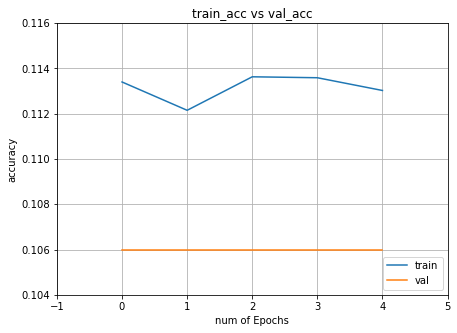

In [16]:
train_loss=hist_sigmoid5.history['loss']
val_loss=hist_sigmoid5.history['val_loss']
train_acc=hist_sigmoid5.history['accuracy']
val_acc=hist_sigmoid5.history['val_accuracy']
xc=range(5)

# plt.figure(1,figsize=(7,5))
# plt.plot(xc,train_loss)
# plt.plot(xc,val_loss)
# plt.xlabel('num of Epochs')
# plt.ylabel('loss')
# plt.title('train_loss vs val_loss')
# plt.grid(True)
# plt.legend(['train','val'])
# print(plt.style.available) # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

relu - 5 epoch testing

In [17]:
model_relu5 = Sequential()
model_relu5.add(Dense(1000, input_dim=784, activation='relu'))
model_relu5.add(Dense(750, activation='relu'))
model_relu5.add(Dense(500, activation='relu'))
model_relu5.add(Dense(250, activation='relu'))
model_relu5.add(Dense(10, activation='softmax'))

In [18]:
model_relu5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [19]:
model_relu5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1000)              785000    
                                                                 
 dense_6 (Dense)             (None, 750)               750750    
                                                                 
 dense_7 (Dense)             (None, 500)               375500    
                                                                 
 dense_8 (Dense)             (None, 250)               125250    
                                                                 
 dense_9 (Dense)             (None, 10)                2510      
                                                                 
Total params: 2039010 (7.78 MB)
Trainable params: 2039010 (7.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
n_epochs = 5
batch_size = 256
validation_split = 0.2
hist_relu5 = model_relu5.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                  validation_split=validation_split, verbose=2)

Epoch 1/5


2023-06-07 22:16:42.373785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 22:16:44.960624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 - 3s - loss: 1.8686 - accuracy: 0.5495 - val_loss: 1.1750 - val_accuracy: 0.7872 - 3s/epoch - 17ms/step
Epoch 2/5
188/188 - 3s - loss: 0.7809 - accuracy: 0.8317 - val_loss: 0.5172 - val_accuracy: 0.8754 - 3s/epoch - 17ms/step
Epoch 3/5
188/188 - 3s - loss: 0.4683 - accuracy: 0.8791 - val_loss: 0.3833 - val_accuracy: 0.8986 - 3s/epoch - 16ms/step
Epoch 4/5
188/188 - 3s - loss: 0.3782 - accuracy: 0.8958 - val_loss: 0.3338 - val_accuracy: 0.9088 - 3s/epoch - 15ms/step
Epoch 5/5
188/188 - 3s - loss: 0.3339 - accuracy: 0.9053 - val_loss: 0.2997 - val_accuracy: 0.9138 - 3s/epoch - 15ms/step


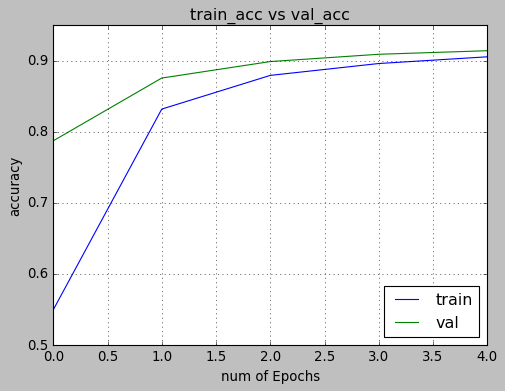

In [21]:
train_loss=hist_relu5.history['loss']
val_loss=hist_relu5.history['val_loss']
train_acc=hist_relu5.history['accuracy']
val_acc=hist_relu5.history['val_accuracy']
xc=range(5)

# plt.figure(1,figsize=(7,5))
# plt.plot(xc,train_loss)
# plt.plot(xc,val_loss)
# plt.xlabel('num of Epochs')
# plt.ylabel('loss')
# plt.title('train_loss vs val_loss')
# plt.grid(True)
# plt.legend(['train','val'])
# print(plt.style.available) # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

sigmoid  - 10 epoch testing

In [22]:
model_sigmoid10 = Sequential()
model_sigmoid10.add(Dense(1000, input_dim=784, activation='sigmoid'))
model_sigmoid10.add(Dense(750, activation='sigmoid'))
model_sigmoid10.add(Dense(500, activation='sigmoid'))
model_sigmoid10.add(Dense(250, activation='sigmoid'))
model_sigmoid10.add(Dense(10, activation='softmax'))

In [23]:
model_sigmoid10.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
model_sigmoid10.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1000)              785000    
                                                                 
 dense_11 (Dense)            (None, 750)               750750    
                                                                 
 dense_12 (Dense)            (None, 500)               375500    
                                                                 
 dense_13 (Dense)            (None, 250)               125250    
                                                                 
 dense_14 (Dense)            (None, 10)                2510      
                                                                 
Total params: 2039010 (7.78 MB)
Trainable params: 2039010 (7.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
n_epochs = 10
batch_size = 256
validation_split = 0.2
hist_sigmoid10 = model_sigmoid10.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                  validation_split=validation_split, verbose=2)

Epoch 1/10


2023-06-07 22:16:57.748712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 22:17:00.597569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 - 3s - loss: 2.3063 - accuracy: 0.1123 - val_loss: 2.3027 - val_accuracy: 0.1060 - 3s/epoch - 18ms/step
Epoch 2/10
188/188 - 3s - loss: 2.3018 - accuracy: 0.1131 - val_loss: 2.3022 - val_accuracy: 0.1060 - 3s/epoch - 16ms/step
Epoch 3/10
188/188 - 3s - loss: 2.3016 - accuracy: 0.1135 - val_loss: 2.3026 - val_accuracy: 0.1060 - 3s/epoch - 15ms/step
Epoch 4/10
188/188 - 3s - loss: 2.3013 - accuracy: 0.1145 - val_loss: 2.3017 - val_accuracy: 0.1060 - 3s/epoch - 16ms/step
Epoch 5/10
188/188 - 3s - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3013 - val_accuracy: 0.1060 - 3s/epoch - 15ms/step
Epoch 6/10
188/188 - 3s - loss: 2.3009 - accuracy: 0.1130 - val_loss: 2.3017 - val_accuracy: 0.1060 - 3s/epoch - 15ms/step
Epoch 7/10
188/188 - 3s - loss: 2.3007 - accuracy: 0.1132 - val_loss: 2.3013 - val_accuracy: 0.1060 - 3s/epoch - 15ms/step
Epoch 8/10
188/188 - 3s - loss: 2.3005 - accuracy: 0.1142 - val_loss: 2.3014 - val_accuracy: 0.1060 - 3s/epoch - 15ms/step
Epoch 9/10
188/188 - 3s - l

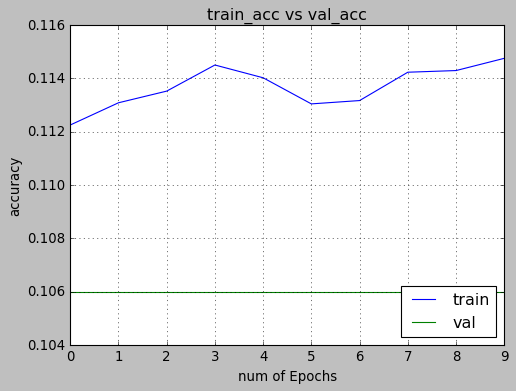

In [26]:
train_loss=hist_sigmoid10.history['loss']
val_loss=hist_sigmoid10.history['val_loss']
train_acc=hist_sigmoid10.history['accuracy']
val_acc=hist_sigmoid10.history['val_accuracy']
xc=range(10)

# plt.figure(1,figsize=(7,5))
# plt.plot(xc,train_loss)
# plt.plot(xc,val_loss)
# plt.xlabel('num of Epochs')
# plt.ylabel('loss')
# plt.title('train_loss vs val_loss')
# plt.grid(True)
# plt.legend(['train','val'])
# print(plt.style.available) # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])

plt.figure(3,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

relu - 10 epoch testing

In [27]:
model_relu10 = Sequential()
model_relu10.add(Dense(1000, input_dim=784, activation='relu'))
model_relu10.add(Dense(750, activation='relu'))
model_relu10.add(Dense(500, activation='relu'))
model_relu10.add(Dense(250, activation='relu'))
model_relu10.add(Dense(10, activation='softmax'))

In [28]:
model_relu10.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [29]:
model_relu10.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1000)              785000    
                                                                 
 dense_16 (Dense)            (None, 750)               750750    
                                                                 
 dense_17 (Dense)            (None, 500)               375500    
                                                                 
 dense_18 (Dense)            (None, 250)               125250    
                                                                 
 dense_19 (Dense)            (None, 10)                2510      
                                                                 
Total params: 2039010 (7.78 MB)
Trainable params: 2039010 (7.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
n_epochs = 10
batch_size = 256
validation_split = 0.2
hist_relu10 = model_relu10.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                  validation_split=validation_split, verbose=2)

Epoch 1/10


2023-06-07 22:17:27.101675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-06-07 22:17:29.819045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 - 3s - loss: 1.7959 - accuracy: 0.5871 - val_loss: 1.0642 - val_accuracy: 0.7968 - 3s/epoch - 17ms/step
Epoch 2/10
188/188 - 3s - loss: 0.7237 - accuracy: 0.8379 - val_loss: 0.4904 - val_accuracy: 0.8815 - 3s/epoch - 16ms/step
Epoch 3/10
188/188 - 3s - loss: 0.4520 - accuracy: 0.8828 - val_loss: 0.3716 - val_accuracy: 0.8998 - 3s/epoch - 15ms/step
Epoch 4/10
188/188 - 3s - loss: 0.3721 - accuracy: 0.8982 - val_loss: 0.3290 - val_accuracy: 0.9070 - 3s/epoch - 15ms/step
Epoch 5/10
188/188 - 3s - loss: 0.3314 - accuracy: 0.9068 - val_loss: 0.2955 - val_accuracy: 0.9178 - 3s/epoch - 16ms/step
Epoch 6/10
188/188 - 3s - loss: 0.3039 - accuracy: 0.9144 - val_loss: 0.2727 - val_accuracy: 0.9229 - 3s/epoch - 15ms/step
Epoch 7/10
188/188 - 3s - loss: 0.2834 - accuracy: 0.9203 - val_loss: 0.2586 - val_accuracy: 0.9270 - 3s/epoch - 15ms/step
Epoch 8/10
188/188 - 3s - loss: 0.2666 - accuracy: 0.9244 - val_loss: 0.2442 - val_accuracy: 0.9312 - 3s/epoch - 15ms/step
Epoch 9/10
188/188 - 3s - l

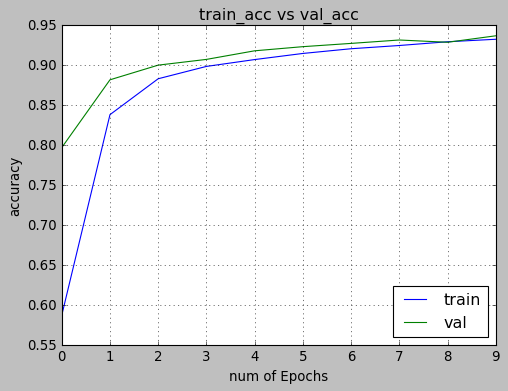

In [31]:
train_loss=hist_relu10.history['loss']
val_loss=hist_relu10.history['val_loss']
train_acc=hist_relu10.history['accuracy']
val_acc=hist_relu10.history['val_accuracy']
xc=range(10)

# plt.figure(1,figsize=(7,5))
# plt.plot(xc,train_loss)
# plt.plot(xc,val_loss)
# plt.xlabel('num of Epochs')
# plt.ylabel('loss')
# plt.title('train_loss vs val_loss')
# plt.grid(True)
# plt.legend(['train','val'])
# print(plt.style.available) # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])

plt.figure(4,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])